In [54]:
import os
import subprocess
import pandas as pd
import io
import matplotlib.pyplot as plt
import json

In [55]:
def runDbscan(dfData, n, r):
    inputText = dfData.to_csv(header=None, sep=' ', index=False)
    cmd = '../bin/andrade'
    result = subprocess.run(
        [ cmd, '--', f'{n}', f'{r}' ],
        input=inputText,
        stdout=subprocess.PIPE, universal_newlines=True, check=True
    )
    dct = json.loads(result.stdout)
    return pd.DataFrame(dct['output'])

t = pd.read_csv('../sample_data/data.dat', sep=' ', header=None, names=['x', 'y'])
#t.to_csv(header=None, sep=' ', index=False)

In [56]:
df = runDbscan(t, 50, 0.4)

In [57]:
clusters = df.groupby('cluster_id')

[]

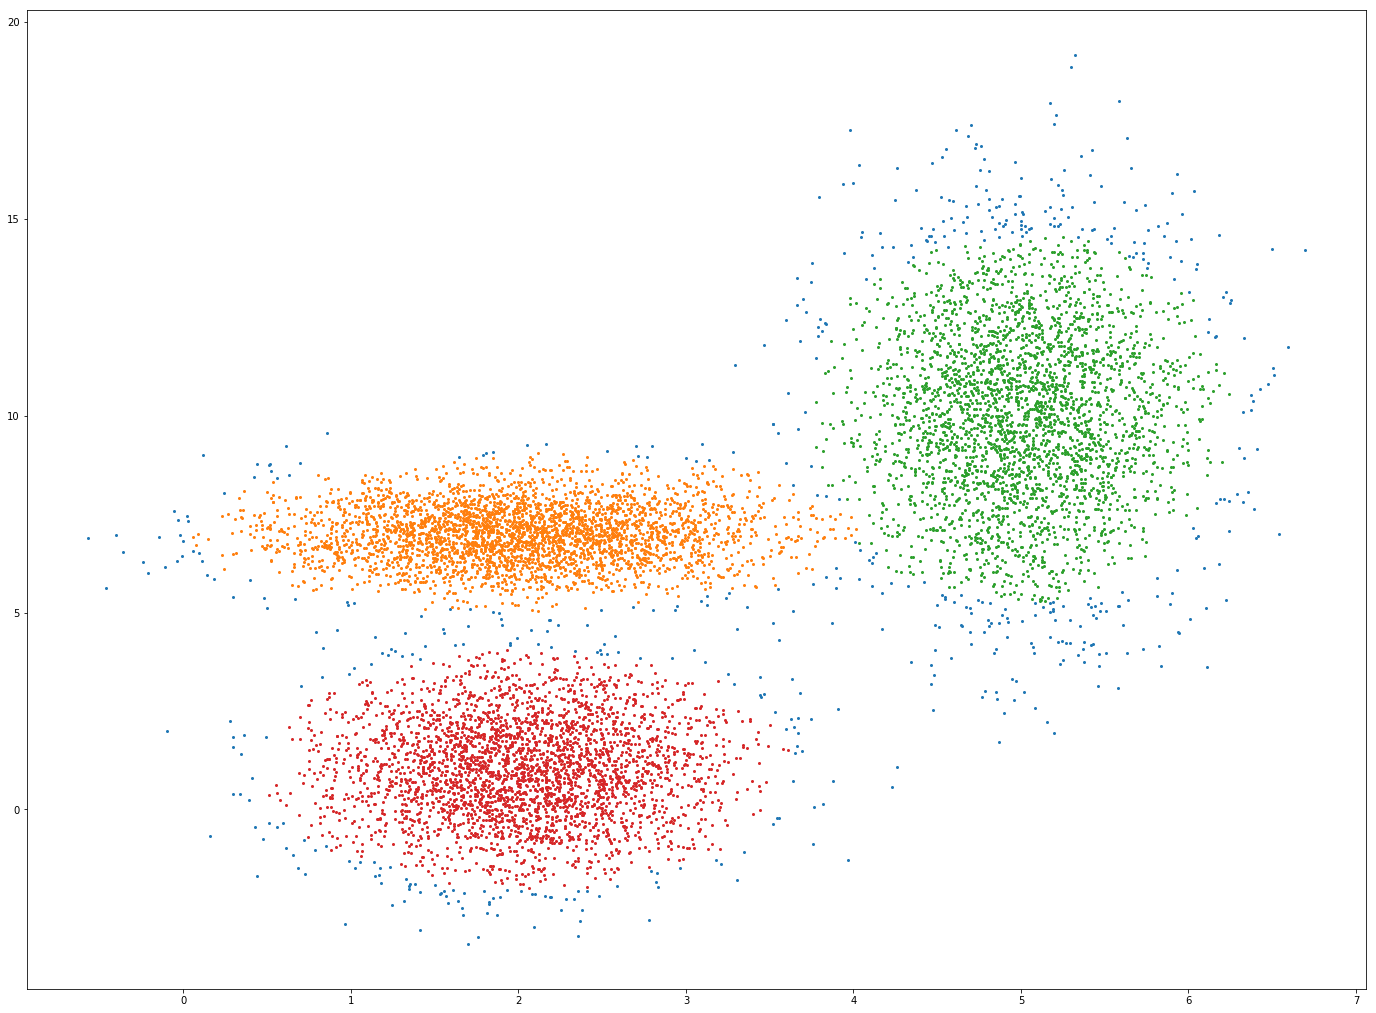

In [58]:
plt.figure(figsize=(24,18))
for clusterId, grp in clusters:
    plt.scatter(grp['x'], grp['y'], s=4)
plt.plot()

In [59]:
df

,cluster_id,is_core,x,y
0,3,1,5.27991,10.41932
1,1,0,5.43183,4.92699
2,4,0,3.23734,2.23162
3,3,1,5.04619,12.80130
4,3,1,4.44748,8.31596
5,3,1,5.45266,12.59880
6,2,1,3.19375,6.67985
7,3,0,4.10798,11.21192
8,3,1,5.24659,9.61144
9,2,1,0.94505,6.40840


In [60]:
set(df['cluster_id'])

{1, 2, 3, 4}